### Mount the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Install and import the relevant libraries

In [2]:
pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does no

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns

In [4]:
from lonboard import viz
from lonboard import Map, SolidPolygonLayer

### Task 1 [Data Exploration]: Load the Chicago parcels dataset using GeoPandas.

In [5]:
# Upload and read the dataset
chicago = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Assignment 2 Data/chicago_parcels/Chicago_parcels.shp')
chicago

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."
...,...,...,...,...,...,...
592516,592517,588217,0.00,-2147483648,-2147483648,"POLYGON ((1198269.792 1832592.793, 1198394.873..."
592517,592518,588218,0.00,-2147483648,-2147483648,"POLYGON ((1198410.986 1832594.443, 1198534.158..."
592518,592519,588216,0.00,-2147483648,-2147483648,"POLYGON ((1198602.435 1832596.186, 1198724.787..."
592519,592520,588215,0.00,-2147483648,-2147483648,"POLYGON ((1198742.539 1832597.464, 1198864.615..."


<Axes: >

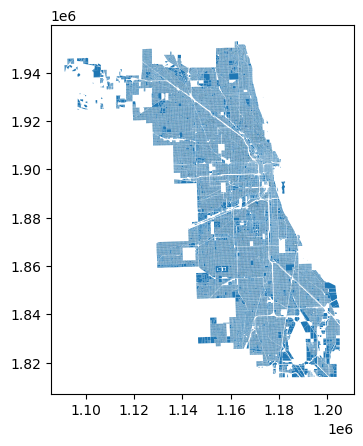

In [6]:
# Visualising the dataset to check that it is correct
chicago.plot()

### Task 2: Display the first few rows of the dataset. Investigate the available attributes and their data types.

In [7]:
# Use head() to display the first five rows of the dataset
chicago.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


In [8]:
# .columns displays the attribute titles in the dataset
chicago.columns

Index(['POLY_ID', 'ID', 'AREA', 'PIN_OLD', 'PIN', 'geometry'], dtype='object')

In [9]:
# .dtypes returns a series on the data types of each column
chicago.dtypes

POLY_ID        int64
ID             int64
AREA         float64
PIN_OLD        int64
PIN            int64
geometry    geometry
dtype: object

### Task 3: Create a map to visualize the spatial distribution of tax parcel polygons in Chicago.

In [10]:
# .crs displays the Coordinate Reference System
chicago.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["NAD83",DATUM[ ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
# Create a GeoDataFrame prior to using viz(), which produces the map required for this task
gdf = gpd.GeoDataFrame(chicago)

In [12]:
viz(gdf)

/usr/local/lib/python3.10/dist-packages/lonboard/_viz.py:156: UserWarning: GeoDataFrame being reprojected to EPSG:4326
  warnings.warn("GeoDataFrame being reprojected to EPSG:4326")


Map(layers=[SolidPolygonLayer(table=pyarrow.Table
POLY_ID: int64
ID: int64
AREA: double
PIN_OLD: int64
PIN: in…

### Task 4 [Correlation Analysis]: Explore correlations between spatial attributes (latitude, longitude) and numerical attributes. Using the text cell, provide insights into any observed correlations.

In [16]:
# .corr is used to find correlations in a dataframe
corr_matrix = gdf.corr
corr_matrix

<bound method DataFrame.corr of         POLY_ID      ID  AREA     PIN_OLD         PIN  \
0             1      93  0.01   836300010   836300010   
1             2      94  0.00   836300011   836300011   
2             3      96  0.02   836300013   836300013   
3             4      95  0.01   836300012   836300012   
4             5      92  0.01   836300009   836300009   
...         ...     ...   ...         ...         ...   
592516   592517  588217  0.00 -2147483648 -2147483648   
592517   592518  588218  0.00 -2147483648 -2147483648   
592518   592519  588216  0.00 -2147483648 -2147483648   
592519   592520  588215  0.00 -2147483648 -2147483648   
592520   592521  588492  0.00 -2147483648 -2147483648   

                                                 geometry  
0       POLYGON ((1091182.694 1942890.287, 1091173.159...  
1       POLYGON ((1092430.298 1943191.955, 1092463.452...  
2       POLYGON ((1092323.996 1942962.610, 1092301.306...  
3       POLYGON ((1092024.119 1942447.762, 

*corr_matrix* does not reveal any significant correlations. Looking at the map produced in **Task 3**, however, we can observe that tax parcels are generally consistently sized. The further away from the city center / harbour (around POLY_ID=550402, ID=284290), though, the more inconsistent tax parcel sizes become (i.e., larger along highways and the periphery).

### **[K-Means Clustering]**
### Task 5: Implement K-Means clustering with different values of n_clusters.
### Task 6: Visualize the clustering results for each value of n_clusters, using multiple lonboard maps, and customized colour ramps.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

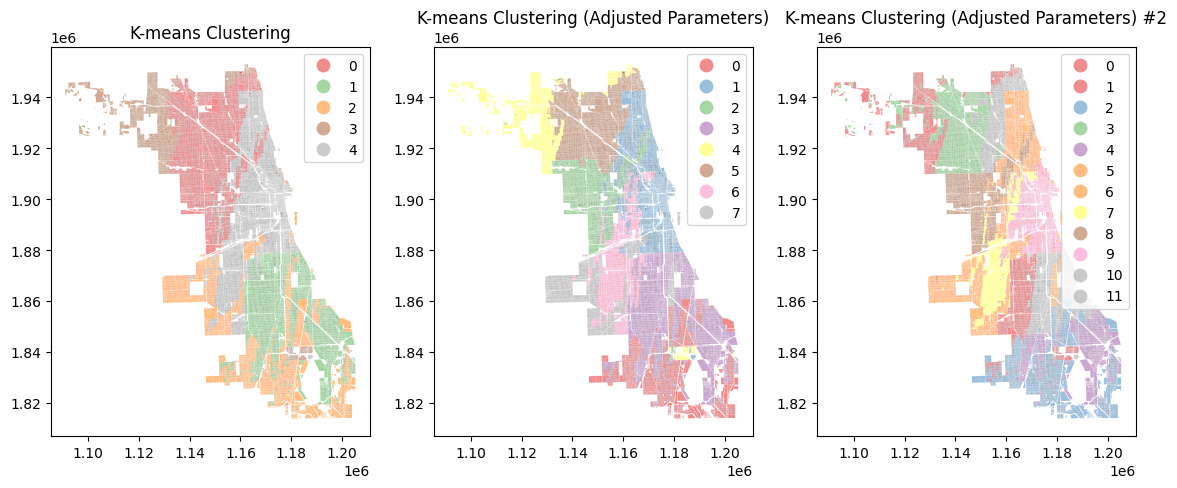

In [ ]:
# K-Means clustering with some default parameters (n_clusters=5)
kmeans = KMeans(n_clusters=5, random_state=42)
gdf['kmeans_cluster'] = kmeans.fit_predict(gdf[['POLY_ID','ID']])

# K-Means clustering with adjusted parameters (n_clusters=8)
kmeans_adjusted = KMeans(n_clusters=8, random_state=42)
gdf['kmeans_cluster_adjusted'] = kmeans_adjusted.fit_predict(gdf[['POLY_ID','ID']])

# K-Means clustering with further adjusted parameters (n_clusters=12)
kmeans_adjusted2 = KMeans(n_clusters=12, random_state=42)
gdf['kmeans_cluster_adjusted2'] = kmeans_adjusted2.fit_predict(gdf[['POLY_ID','ID']])

# Visualize clustering results
fig, axes = plt.subplots(1, 3, figsize=(14, 8))

# K-Means
gdf.plot(ax=axes[0], column='kmeans_cluster', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[0].set_title('K-means Clustering')

gdf.plot(ax=axes[1], column='kmeans_cluster_adjusted', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[1].set_title('K-means Clustering (Adjusted Parameters)')

gdf.plot(ax=axes[2], column='kmeans_cluster_adjusted2', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[2].set_title('K-means Clustering (Adjusted Parameters) #2')

plt.show()

### Task 7: Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your choice in a markdown cell.

With regards to the clustering results, I believe the 'optimal' value for *n_clusters* to be 8. Visually, **K-means Clustering (Adjusted Parameters)** partitions the tax parcels the most meaningfully, in that it clearly illustrates patterns of similar activity, as well as outliers. In comparison, the identified groups in **K-means Clustering** are too large to be meaningful (i.e., the plot is very general and does not reveal any significant data), especially with a dataset comprising more than half a million records. On the other hand, **K-means Clustering (Adjusted Parameters) #2** is ineffectual in the sense that there is too much *noise*. The higher number of centroids (here, it is 12) creates visual inconsistency. Overall, *n_clusters=8* produces the most rational plot and thus is considered as the 'optimal' value in this exercise.

### **[DBSCAN Clustering]**
### Task 8: Implement the DBSCAN method. Experiment with different values of eps and min_samples in DBSCAN (at least three)
### Task 9: Plot the clustering results for each combination of parameters. Therefore, you should create a plot matrix 3*3 (min_samples and eps)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

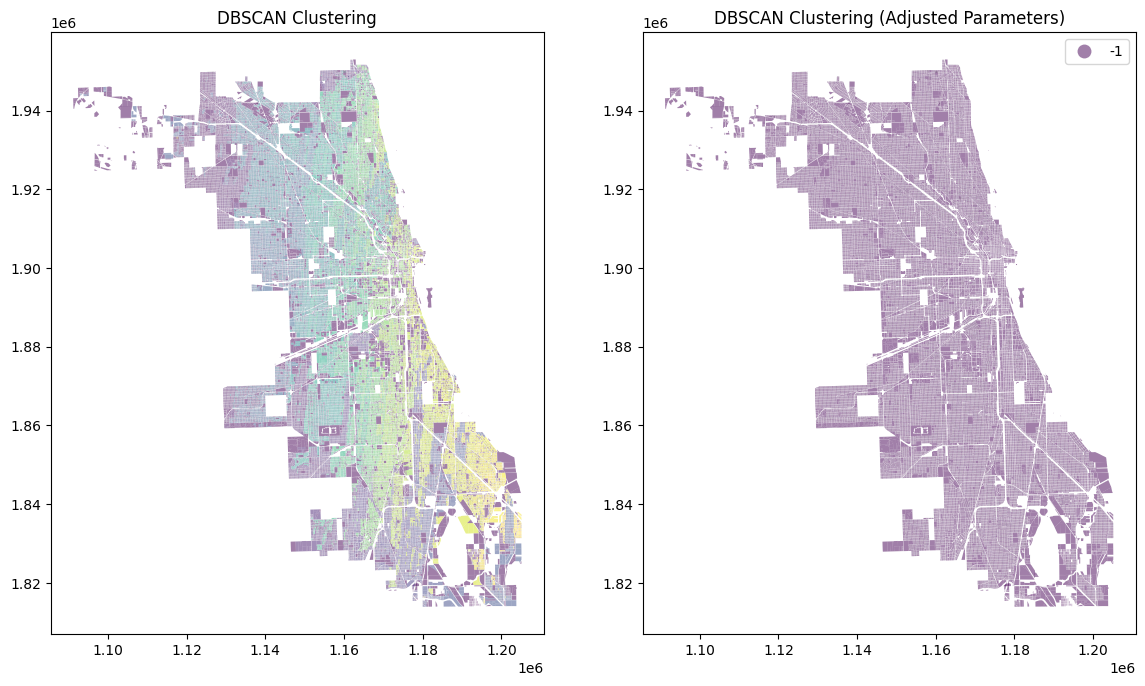

In [ ]:
# DBSCAN clustering with some default parameters
dbscan = DBSCAN(eps=5, min_samples=5)
gdf['dbscan_cluster'] = dbscan.fit_predict(gdf[['POLY_ID', 'ID']])

# DBSCAN clustering with adjusted parameters
dbscan_adjusted = DBSCAN(eps=5, min_samples=10)
gdf['dbscan_cluster_adjusted'] = dbscan_adjusted.fit_predict(gdf[['POLY_ID', 'ID']])

# Visualize clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# DBSCAN
gdf.plot(ax=axes[0], column='dbscan_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0].set_title('DBSCAN Clustering')

gdf.plot(ax=axes[1], column='dbscan_cluster_adjusted', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[1].set_title('DBSCAN Clustering (Adjusted Parameters)')

plt.show()

### Task 10: Using a text cell provide your insights and evaluation of the impact of changes in eps and min_samples on the clusters, and finally recommend suitable values for eps and min_samples based on your analysis.
#### *Note: Consider the real-world implications of your findings, especially in the context of urban planning or data-driven decision-making.*

First, it should be clarified that varying the value of *eps* beyond *eps=5* failed to generate any significant plots due to sizing errors (attributed to the dataset containing 500,000+ records). This was similarly observed when varying the values of *min_samples*.

DBSCAN is especially valuable in spatial data analysis where (1) clusters of arbitrary shapes and sizes, and (2) regions with varying data point densities exist. Looking at the plotted map of tax parcels in Chicago [see result of *viz(gdf)* in Task 3], we can note their irregularity in spatial distribution and density.

Now, evaluating the clustering results, it can be inarguably determined that *eps=5, min_clusters=5* produces the most suitable plot. It clearly defines, visually, the differences in density around Chicago, effectively portraying spatial patterns between the center and outskirts of the city.

Changing the value of *eps* and *min_samples* determines how researchers (like myself), organisations or the state geographically categorises neighbourhoods ('clusters'). Depending on the values they use, the extent and density of localities may change. Further, such data can be used to find hotspots, anomalies, or outlier population densities, which can then be employed in urban planning tactics or schemes - like, for example, the most ideal areas for large-scale developments (i.e., away from hotspots yet still conveniently situated).